In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style= "whitegrid", font_scale=1.3)

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Loading and analysing the Dataset

In [3]:
df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [4]:
df.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [5]:
df.shape

(9557, 143)

In [6]:
df.describe()

v2a1       hacdor        rooms       hacapo         v14a  \
count  2.697000e+03  9557.000000  9557.000000  9557.000000  9557.000000   
mean   1.652316e+05     0.038087     4.955530     0.023648     0.994768   
std    1.504571e+05     0.191417     1.468381     0.151957     0.072145   
min    0.000000e+00     0.000000     1.000000     0.000000     0.000000   
25%    8.000000e+04     0.000000     4.000000     0.000000     1.000000   
50%    1.300000e+05     0.000000     5.000000     0.000000     1.000000   
75%    2.000000e+05     0.000000     6.000000     0.000000     1.000000   
max    2.353477e+06     1.000000    11.000000     1.000000     1.000000   

            refrig         v18q        v18q1         r4h1         r4h2  ...  \
count  9557.000000  9557.000000  2215.000000  9557.000000  9557.000000  ...   
mean      0.957623     0.231767     1.404063     0.385895     1.559171  ...   
std       0.201459     0.421983     0.763131     0.680779     1.036574  ...   
min       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     1.000000     0.000000     1.000000  ...   
50%       1.000000     0.000000     1.000000     0.000000     1.000000  ...   
75%       1.000000     0.000000     2.000000     1.000000     2.000000  ...   
max       1.000000     1.000000     6.000000     5.000000     8.000000  ...   

       SQBescolari       SQBage  SQBhogar_total    SQBedjefe  SQBhogar_nin  \
count  9557.000000  9557.000000     9557.000000  9557.000000   9557.000000   
mean     74.222769  1643.774302       19.132887    53.500262      3.844826   
std      76.777549  1741.197050       18.751395    78.445804      6.946296   
min       0.000000     0.000000        1.000000     0.000000      0.000000   
25%      16.000000   289.000000        9.000000     0.000000      0.000000   
50%      36.000000   961.000000       16.000000    36.000000      1.000000   
75%     121.000000  2601.000000       25.000000    81.000000      4.000000   
max     441.000000  9409.000000      169.000000   441.000000     81.000000   

       SQBovercrowding  SQBdependency    SQBmeaned        agesq       Target  
count      9557.000000    9557.000000  9552.000000  9557.000000  9557.000000  
mean          3.249485       3.900409   102.588867  1643.774302     3.302292  
std           4.129547      12.511831    93.516890  1741.197050     1.009565  
min           0.040000       0.000000     0.000000     0.000000     1.000000  
25%           1.000000       0.111111    36.000000   289.000000     3.000000  
50%           2.250000       0.444444    81.000000   961.000000     4.000000  
75%           4.000000       1.777778   134.560010  2601.000000     4.000000  
max          36.000000      64.000000  1369.000000  9409.000000     4.000000  

[8 rows x 138 columns]

In [7]:
df.describe(exclude='number') #Analysis of non numeric column

Id    idhogar dependency edjefe edjefa
count           9557       9557       9557   9557   9557
unique          9557       2988         31     22     22
top     ID_e43633875  fd8a6d014        yes     no     no
freq               1         13       2192   3762   6230

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


### Analysing target columns

In [9]:
from collections import Counter

In [10]:
target = df.values[:,-1]

In [11]:
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=4, Count=5996, Percentage=62.739%
Class=2, Count=1597, Percentage=16.710%
Class=3, Count=1209, Percentage=12.650%
Class=1, Count=755, Percentage=7.900%


In [12]:
dftest.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00        NaN    324  

[5 rows x 142 columns]

In [13]:
dftest.shape

(23856, 142)

<br>

## Pandas profiling report

In [14]:
import pandas_profiling as pp

In [15]:
pp.ProfileReport(df)

### Combining Train and Test Data

In [16]:
df_train = df.drop(['Target'],axis = 1)
df_target = df[['Target']]

In [17]:
df_train.shape

(9557, 142)

In [18]:
df_test = dftest.copy()

In [19]:
all_data = df_train.append(df_test)

In [20]:
all_data.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     0  ...   43          100    1849               1        100   
1     0  ...   67          144    4489               1        144   
2     0  ...   92          121    8464               1          0   
3     0  ...   17           81     289              16        121   
4     0  ...   37          121    1369              16        121   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             0         1.000000            0.0      100.0   1849  
1             0         1.000000           64.0      144.0   4489  
2             0         0.250000           64.0      121.0   8464  
3             4         1.777778            1.0      121.0    289  
4             4         1.777778            1.0      121.0   1369  

[5 rows x 142 columns]

In [21]:
all_data.shape

(33413, 142)

# Removing corelated columns

<font size ='3'> The below code returns a dataframe of shape (n_cols,n_cols) for all the numeric columns, **with each element representing the correlation between the two respective columns**</font>

In [22]:
all_data.shape

(33413, 142)

In [23]:
all_data_corr = all_data.corr().abs()
all_data_corr.shape

(137, 137)

In [24]:
all_data_corr.head(3)

v2a1    hacdor     rooms    hacapo      v14a    refrig      v18q  \
v2a1    1.000000  0.127465  0.453555  0.096236  0.004382  0.093686  0.288995   
hacdor  0.127465  1.000000  0.254807  0.621351  0.106732  0.112258  0.082324   
rooms   0.453555  0.254807  1.000000  0.240342  0.112989  0.147001  0.244902   

           v18q1      r4h1      r4h2  ...       age  SQBescolari    SQBage  \
v2a1    0.220090  0.083849  0.040710  ...  0.081679     0.319282  0.072965   
hacdor  0.030833  0.287641  0.045340  ...  0.134443     0.128321  0.114828   
rooms   0.266470  0.101670  0.236511  ...  0.094121     0.240249  0.084756   

        SQBhogar_total  SQBedjefe  SQBhogar_nin  SQBovercrowding  \
v2a1          0.022772   0.333262      0.095155         0.203074   
hacdor        0.350265   0.083421      0.426490         0.660443   
rooms         0.170377   0.208987      0.053066         0.310810   

        SQBdependency  SQBmeaned     agesq  
v2a1         0.052137   0.375273  0.072965  
hacdor       0.016467   0.116290  0.114828  
rooms        0.033600   0.248382  0.084756  

[3 rows x 137 columns]

<br>

<font size ='3'> The below code creats a mask to help remove columns with correlation constant > 0.95 and **returns a list of columns having high correlation** and are to be removed</font>

In [25]:
# Create and apply mask
mask = np.triu(np.ones_like(all_data_corr, dtype=bool))
df_cols_drop = all_data_corr.mask(mask)

to_drop = [c for c in df_cols_drop.columns if any(df_cols_drop[c] > 0.95)]
print(to_drop)

['r4t3', 'tamhog', 'hhsize', 'public', 'male', 'hogar_total', 'meaneduc', 'area1', 'age', 'SQBage']


In [26]:
all_data.drop(to_drop, axis=1,inplace = True)

In [27]:
all_data.shape

(33413, 132)

## Analyzing missing values in columns

In [28]:
all_data.shape

(33413, 132)

In [29]:
a = all_data.isnull().sum()/len(all_data)*100
missing_data = pd.DataFrame({'Missing Value %' :a}).sort_values('Missing Value %',ascending=False)
missing_data.head(5)

Missing Value %
rez_esc          82.545716
v18q1            76.221830
v2a1             72.615449
SQBmeaned         0.107742
idhogar           0.000000

<font size = '3'> **Removing columns with more than 70 per cent missing values**</font>

In [30]:
mask_all_data = all_data.isna().sum()/len(all_data) < 0.7

In [31]:
all_data = all_data.loc[:, mask_all_data]
all_data.shape #As we can see, 3 columns have been removed from the data set

(33413, 129)


## Analysing Columns with NA values

In [32]:
all_data['SQBmeaned']

0        100.0000
1        144.0000
2        121.0000
3        121.0000
4        121.0000
           ...   
23851     33.0625
23852     36.0000
23853     36.0000
23854     36.0000
23855     36.0000
Name: SQBmeaned, Length: 33413, dtype: float64

## Treating NA  values

In [33]:
all_data['SQBmeaned'] = all_data['SQBmeaned'].fillna(all_data['SQBmeaned'].mean())

### Defining a custom function to *Randomly fill*  NA values a column.

In [34]:
# def randomiseMissingData(dff,col):
    
#         data = dff[col]
#         mask = data.isnull()
#         samples = np.random.choice(data[~mask].values , size = mask.sum() )
#         data[mask] = samples

## Feature Engineering

### Analysis and Pre-Processing of columns of object data type

In [35]:
s_object = (all_data.dtypes == 'object')
object_cols = list(s_object[s_object].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']


In [36]:
all_data[['idhogar', 'dependency', 'edjefe', 'edjefa']].head(10)

idhogar dependency edjefe edjefa
0  21eb7fcc1         no     10     no
1  0e5d7a658          8     12     no
2  2c7317ea8          8     no     11
3  2b58d945f        yes     11     no
4  2b58d945f        yes     11     no
5  2b58d945f        yes     11     no
6  2b58d945f        yes     11     no
7  d6dae86b7        yes      9     no
8  d6dae86b7        yes      9     no
9  d6dae86b7        yes      9     no

<font size = '4'> We observe that the column 'idhogar' doesn't add any usefull information to the data set so we will drop it.

In [37]:
all_data.drop('idhogar', axis = 1, inplace = True)

In [38]:
all_data['dependency'].value_counts().head()

yes    7580
no     6036
.5     5175
2      2499
1.5    2471
Name: dependency, dtype: int64

In [39]:
all_data['dependency'].replace(['no','yes'],[0,0.0000001],inplace = True)

In [40]:
all_data['dependency'].replace([0.0000001],[all_data['dependency'].astype(float).mean()],inplace = True)

In [41]:
all_data['edjefe'].value_counts().head(18)

no     12818
6       6958
11      2507
9       1564
3       1046
8       1020
15       910
14       804
7        797
17       702
5        685
2        617
16       609
4        505
12       494
yes      416
10       395
13       341
Name: edjefe, dtype: int64

In [42]:
all_data['edjefe'].replace(['no','yes'],[0,0.0000001],inplace = True)

In [43]:
all_data['edjefe'].replace([0.0000001],[all_data['edjefe'].astype(float).mean()],inplace = True)

In [44]:
all_data['edjefa'].replace(['no','yes'],[0,0.0000001],inplace = True)

In [45]:
all_data['edjefa'].replace([0.0000001],[all_data['edjefa'].astype(float).mean()],inplace = True)

In [46]:
all_data[[ 'dependency', 'edjefe', 'edjefa']].head(10)

dependency  edjefe  edjefa
0     0.00000    10.0     0.0
1     8.00000    12.0     0.0
2     8.00000     0.0    11.0
3     0.94538    11.0     0.0
4     0.94538    11.0     0.0
5     0.94538    11.0     0.0
6     0.94538    11.0     0.0
7     0.94538     9.0     0.0
8     0.94538     9.0     0.0
9     0.94538     9.0     0.0

In [47]:
all_data.shape

(33413, 128)

In [48]:
s_object = (all_data.dtypes == 'object')
object_cols = list(s_object[s_object].index)

print("Categorical variables:")
print(object_cols)
print(len(object_cols))

Categorical variables:
['Id']
1


In [49]:
s_int = (all_data.dtypes == 'int64')
int_cols = list(s_int[s_int].index)
print('Intergeral Vairables:')
print(int_cols)
print(len(int_cols))

Intergeral Vairables:
['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'tamviv', 'escolari', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', 'paren

In [50]:
s_float = (all_data.dtypes == 'float64')
float_cols = list(s_float[s_float].index)
print('Float Vairables:')
print(float_cols)
print(len(float_cols))

Float Vairables:
['dependency', 'edjefe', 'edjefa', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']
7


In [51]:
int_cols.extend(float_cols)
numeric_cols = int_cols[:]
print(len(numeric_cols))

127


### Extracting train and test set from all_data

In [52]:
df_train = all_data.head(9557)

In [53]:
df_test = all_data.tail(23859)
df_test = df_test.reset_index(drop=True)

In [54]:
df_train.head()

Id  hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  r4h3  \
0  ID_279628684       0      3       0     1       1     0     0     1     1   
1  ID_f29eb3ddd       0      4       0     1       1     1     0     1     1   
2  ID_68de51c94       0      8       0     1       1     0     0     0     0   
3  ID_d671db89c       0      5       0     1       1     1     0     2     2   
4  ID_d56d6f5f5       0      5       0     1       1     1     0     2     2   

   ...  lugar6  area2  SQBescolari  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0  ...       0      0          100               1        100             0   
1  ...       0      0          144               1        144             0   
2  ...       0      0          121               1          0             0   
3  ...       0      0           81              16        121             4   
4  ...       0      0          121              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0         1.000000            0.0      100.0   1849  
1         1.000000           64.0      144.0   4489  
2         0.250000           64.0      121.0   8464  
3         1.777778            1.0      121.0    289  
4         1.777778            1.0      121.0   1369  

[5 rows x 128 columns]

In [55]:
df_test.head()

Id  hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  r4h3  \
0  ID_85fc658f8       0      6       0     1       1     0     0     2     2   
1  ID_ced540c61       0      6       0     1       1     0     0     2     2   
2  ID_a38c64491       0      6       0     1       1     0     0     2     2   
3  ID_2f6873615       0      5       0     1       1     0     1     1     2   
4  ID_1c78846d2       0      5       0     1       1     0     1     1     2   

   ...  lugar6  area2  SQBescolari  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0  ...       1      1           25              25         81             1   
1  ...       1      1          121              25         81             1   
2  ...       1      1           64              25         81             1   
3  ...       0      0            0               9          0             1   
4  ...       0      0          256               9          0             1   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0           1.5625         0.0625    68.0625   2500  
1           1.5625         0.0625    68.0625    676  
2           1.5625         0.0625    68.0625    441  
3           2.2500         0.2500   272.2500     16  
4           2.2500         0.2500   272.2500   1681  

[5 rows x 128 columns]

## Applying PCA to Columns with binary classes

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 25)
df_train_pca = pca.fit_transform(df_train[numeric_cols]) #here df_train represent train set with all the variables except the target variable
df_train_pca

array([[ 2.05299642e+02,  3.51384629e+01, -3.39985072e+01, ...,
        -5.85992026e-01, -7.77316764e-02,  3.67153135e-01],
       [ 2.84520394e+03,  1.19192610e+02, -3.95895057e+01, ...,
        -4.53624760e-01,  3.03487319e-01, -3.36459071e-01],
       [ 6.82029197e+03,  3.43491834e+01,  7.50054289e+01, ...,
        -6.86933582e-01, -3.11147006e-01, -4.18040910e-01],
       ...,
       [ 8.56250884e+02, -3.26025480e+01, -5.11445900e+01, ...,
         9.01221242e-01,  5.42957900e-01, -7.17911901e-01],
       [-9.67474768e+02,  8.85797514e+00, -2.61131295e+01, ...,
         1.45086620e-01,  7.66401590e-01, -5.47211383e-01],
       [-1.20259864e+03, -2.04087321e+01, -4.23292030e+01, ...,
        -1.16331984e-01,  1.13695040e+00, -2.35727896e-01]])

In [57]:
df_train_pca = pd.DataFrame(data = df_train_pca)
df_train_pca.head()

0           1          2          3          4          5   \
0   205.299642   35.138463 -33.998507 -22.040281 -18.133154  -3.962300   
1  2845.203944  119.192610 -39.589506 -17.844931  -9.320947  53.045055   
2  6820.291968   34.349183  75.005429   9.093606   1.809905  41.509207   
3 -1354.885779   45.168874 -51.031432  -2.402389  -6.950824   1.111695   
4  -274.825742   68.943263 -38.707669 -29.423943  -2.537826  -1.321170   

         6         7         8         9   ...        15        16        17  \
0  2.327412  1.209847 -1.828545 -0.235202  ... -0.089021  1.501559 -0.898825   
1 -3.405588  2.476157  0.338296 -0.475301  ... -0.722798  1.476721 -1.449582   
2 -0.554548 -3.574253  3.428466 -0.896825  ... -0.656245  0.792716 -0.181939   
3 -0.329068 -0.153757 -2.046345 -1.687241  ...  0.501835 -0.529901 -1.062172   
4  1.034874  0.224249 -2.222574 -1.164988  ...  0.689334 -0.687407 -0.975835   

         18        19        20        21        22        23        24  
0  0.344845  0.042230  0.482860  1.849086 -0.585992 -0.077732  0.367153  
1  0.441239  0.682101  0.332343  0.545660 -0.453625  0.303487 -0.336459  
2 -0.095842  0.967919  0.401015  0.151138 -0.686934 -0.311147 -0.418041  
3  0.972559  0.254921 -0.211586  0.781179 -0.750077  0.068073 -0.018132  
4  1.052300  0.413894  0.728906  0.545364  0.433080 -0.527724 -0.343671  

[5 rows x 25 columns]

In [58]:
df_train_pca.shape

(9557, 25)

<br>

<font size ='4'>Transforming test data with pca</font>

In [59]:
df_test_pca = pca.transform(df_test[numeric_cols])
df_test_pca

array([[ 8.56250884e+02, -3.26025480e+01, -5.11445900e+01, ...,
         8.83783077e-01,  5.50973709e-01, -6.82680138e-01],
       [-9.67474768e+02,  8.85797514e+00, -2.61131295e+01, ...,
         1.27975650e-01,  7.59522671e-01, -5.56503785e-01],
       [-1.20259864e+03, -2.04087321e+01, -4.23292030e+01, ...,
        -1.35335442e-01,  1.12816203e+00, -2.31695015e-01],
       ...,
       [-1.49944693e+03, -9.04025857e+01, -2.96907228e+01, ...,
        -2.80359267e-01, -1.29968341e-01, -1.10812064e-02],
       [-1.49942621e+03, -8.58982218e+01, -2.71589540e+01, ...,
        -2.58166275e-01, -1.42730967e-01,  1.44296411e-03],
       [ 9.57526497e+02, -7.17022847e+01, -2.15263176e+01, ...,
         6.10733121e-01, -2.80045663e-01,  5.63548407e-02]])

In [60]:
df_test_pca = pd.DataFrame(data = df_test_pca)
df_test_pca.head()

0           1           2           3          4         5   \
0   856.250884  -32.602548  -51.144590   25.249724   5.238621 -7.542814   
1  -967.474768    8.857975  -26.113129  -63.398030   3.327700 -0.898219   
2 -1202.598638  -20.408732  -42.329203  -17.876362   0.730938 -1.124606   
3 -1628.860968   52.018223   93.539082  149.085084 -16.204167 -0.899965   
4    36.678037  185.690148  167.043031  -52.217201  -2.816694 -1.643617   

         6         7         8         9   ...        15        16        17  \
0 -4.188970 -0.407318 -0.783666 -0.221487  ... -1.838835  0.285233  0.550314   
1 -4.808751  0.501370 -1.602197 -0.346440  ... -1.947106  0.238841  0.491178   
2 -5.603057 -0.014384 -1.248463 -0.865496  ... -1.935415  0.374687  0.458461   
3 -1.493432 -5.350807  5.952536  1.763966  ... -0.223210  0.133267  0.102699   
4  2.442880 -2.859854  4.183909  1.526975  ...  0.265768 -0.513595  0.026306   

         18        19        20        21        22        23        24  
0  0.370529 -0.623757  0.488309  0.113102  0.883783  0.550974 -0.682680  
1  0.314271 -0.870099 -0.226492  0.227989  0.127976  0.759523 -0.556504  
2  0.288184 -0.832739 -0.334934  0.306657 -0.135335  1.128162 -0.231695  
3 -0.767821 -0.325912 -0.225588  0.847236  0.304934 -0.603414  0.949561  
4 -0.709181 -0.143912  0.340538  0.709121  0.649069 -0.988639  0.788634  

[5 rows x 25 columns]

In [61]:
df_test_pca.shape

(23859, 25)

### Applying Min-Max Scaler on the column with large data values



In [62]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

In [63]:
df_train_pca = standard_scaler.fit_transform(df_train_pca)

In [64]:
df_train_pca = pd.DataFrame(data = df_train_pca)

In [65]:
df_test_pca = standard_scaler.transform(df_test_pca)

In [66]:
df_test_pca = pd.DataFrame(data = df_test_pca)

## Combining to get the final data set

In [67]:
df_train_final = df_train_pca.copy(deep = True)

In [68]:
df_test_final = df_test_pca.copy(deep = True)

# Visualisation using seaborn

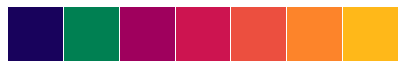

In [69]:
#Creating my own pallete
my_pallete = ['#18025c','#008052','#9f005d','#cd1450','#ec4f3f','#fd842a','#ffb819']
sns.set_palette(my_pallete)
sns.palplot(sns.color_palette()) #Setting your own palle

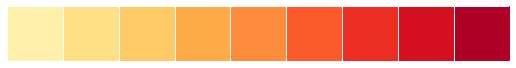

In [70]:
sns.palplot(sns.color_palette("YlOrRd", 9))

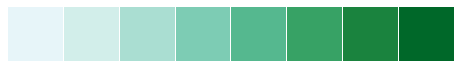

In [71]:
sns.palplot(sns.color_palette("BuGn", 8))

In [72]:
target_values = df_target['Target'].value_counts()
target_values = pd.DataFrame(target_values)
target_values['Household_type'] = target_values.index
target_values

Target  Household_type
4    5996               4
2    1597               2
3    1209               3
1     755               1

In [73]:
mappy = {4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"}
target_values['Household_type'] = target_values.Household_type.map(mappy)
target_values #Mapping a class wise values according to their labels

Target    Household_type
4    5996     NonVulnerable
2    1597        Vulnerable
3    1209  Moderate Poverty
1     755  Extereme Poverty

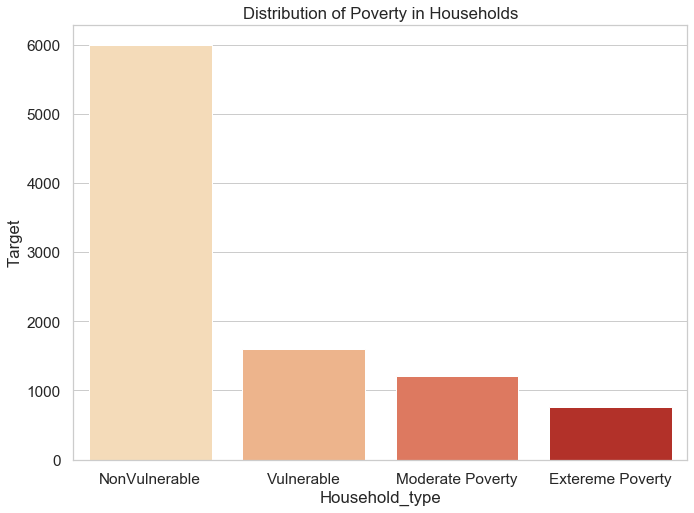

In [74]:
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(11, 8))
ax = sns.barplot(x = 'Household_type', y = 'Target',palette = 'OrRd', data = target_values, ci = None).set_title('Distribution of Poverty in Households')

<font size ='4'> **As an 'insight', we can claim that classes are skewed. 
 And, probably, without any effort our algorithms will have large errors predicting Extreme Powerty.**</font>

In [75]:
# Import label encoder 
from sklearn import preprocessing 

In [76]:
from sklearn.preprocessing import LabelEncoder  
le_target = LabelEncoder() #Target vaiable is encoded because XGboost starts its multi classes from (0,1,2,3), where as our current classes are (1,2,3,4)

In [77]:
df_target['Target'] = le_target.fit_transform(df_target['Target'])

In [78]:
df_target.head()

Target
0       3
1       3
2       3
3       3
4       3

## Applying ML models

In [79]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier , EasyEnsembleClassifier
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.metrics import classification_report

In [106]:
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold ,KFold, cross_val_score, cross_validate, train_test_split #For cross validation
from sklearn import metrics
from sklearn.metrics import f1_score,make_scorer,r2_score, roc_auc_score,precision_score,roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV ,RandomizedSearchCV

In [81]:

x_train,x_test,y_train,y_test = train_test_split(df_train_final,df_target,
                                                 stratify = df_target,
                                                 test_size = 0.20)

In [111]:
class Ml_Model():
    
    def __init__(self,model):
        self.X = x_train
        self.y = y_train
        self.X_test = x_test
        self.y_test = y_test
        self.X_full = df_train_final
        self.target = df_target
        self.model = model
        self.kf = StratifiedKFold(n_splits=5,shuffle = True, random_state=None) 
    
    def fit_deploy(self):
        
        self.model.fit(self.X,self.y )
        self.predictions_train =  self.model.predict(self.X)
        self.predictions =  self.model.predict(self.X_test)
        print('precision_score on train set:', precision_score(self.y,self.predictions_train, labels=[0,1,2], average='micro'))
        print('f1_score on train set:', f1_score(self.y,self.predictions_train,average='micro'))
        print('precision_score on test set:', precision_score(self.y_test,self.predictions,labels=[0,1,2], average='micro'))
        print('f1_score on test set:', f1_score(self.y_test,self.predictions,average='micro'))
        #In the above cases the average has been taken as micro to account for the imbalance in the target labels
        print(classification_report(self.y_test, self.predictions))

        
    def cross_validation(self):
        #f1_scorer = make_scorer(f1_sccore) #This step helps us to use a custom scoring instead of default in cross validation
        results = cross_val_score(self.model, self.X_full, self.target, cv=self.kf,scoring = 'accuracy')
        print("Accuracy: %.3f%% (Std dev. %.3f%%)" % (results.mean()*100.0, results.std()*100.0))    
        
    def Randomized_Search_CV(self,param_dist):
        random_search = RandomizedSearchCV(estimator=self.model, param_distributions=param_dist, n_iter=40,cv=self.kf,verbose = 4,n_jobs = -1)
        rs = random_search.fit(self.X,self.y)
        
        self.best_model = rs.best_estimator_ 
        
        print('Best Score:', rs.best_score_)
        print('Best Parameters:', rs.best_params_)
        return rs.best_estimator_ 
    
    def generate_submission_file(self,name):
        final_prediction = self.best_model.predict(df_test_final)
        submission = pd.DataFrame(final_prediction, columns=['SalePrice'])
        submission_final = pd.concat([df_test_final,submission], axis=1)
        submission_final_DataFrame = dftest_submissionTuesdayRF[['Id','SalePrice']]
        submission_final_DataFrame.to_csv(name,index=False)
        
        return submission_final_DataFrame.head()

<font size='3'>**Calculate heuristic class weighting for logistic regression**</font>

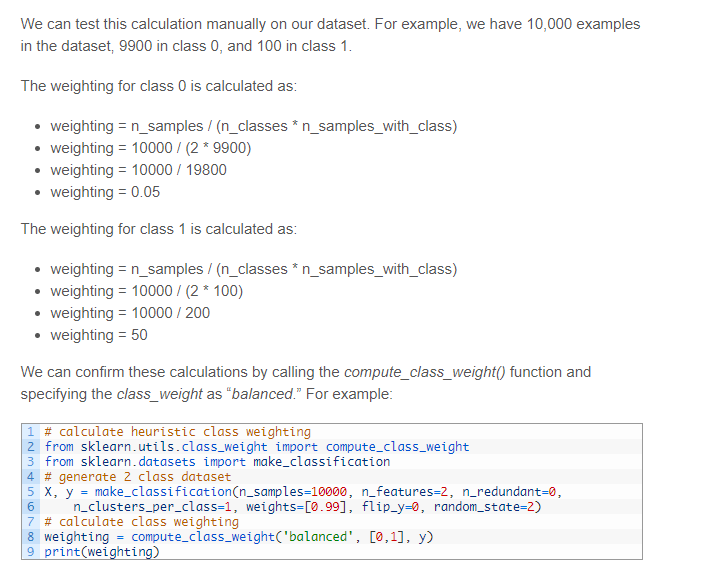

In [112]:
from sklearn.utils.class_weight import compute_class_weight

In [113]:
weighting = compute_class_weight('balanced', np.unique(np.ravel(df_target)), np.ravel(y_train))
print(weighting)

[3.16432119 1.49550078 1.97647363 0.39850917]


## Class-Weighted Logistic Regression 


In [122]:
weighted_reg = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs', C = 650,class_weight={0:1.0,1:0.66,2:0.55,3:0.13})
                            
#weighted_reg.get_params()

In [123]:
param_dist = {  "C": range(100,1500,15) }

<font size ='4'> Normal logistic regression

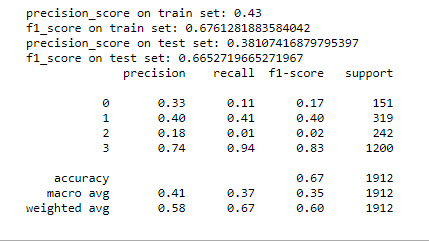

<font size ='4'>Class-Weighted Logistic Regression</font>

In [124]:
weighted_reg_model = Ml_Model(weighted_reg)
weighted_reg_model.fit_deploy()

precision_score on train set: 0.30299949161159123
f1_score on train set: 0.581294964028777
precision_score on test set: 0.26417004048583
f1_score on test set: 0.5564853556485355
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       151
           1       0.28      0.55      0.37       319
           2       0.24      0.16      0.19       242
           3       0.87      0.67      0.76      1200

    accuracy                           0.56      1912
   macro avg       0.41      0.42      0.40      1912
weighted avg       0.64      0.56      0.58      1912



<font size ='3'>**Clearly the balanced model performs much better on minority classes** as is evident from significant increase in recall scores of minority classes</font>

In [125]:
weighted_reg_model.cross_validation()

Accuracy: 57.361% (Std dev. 0.871%)


In [87]:
#softmax_reg_model.Randomized_Search_CV(param_dist)

Best Score: 0.6695879659908437
Best Parameters: {'C': 655}

## Random forest

In [126]:
random_forest = RandomForestClassifier(n_estimators = 650,random_state=1, max_depth=8,
                                       class_weight='balanced'
                                      )
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1.0, 1: 0.66, 2: 0.55, 3: 0.13},
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 650,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [127]:
param_dist = {"max_depth": [2,4, 6, 8],
             "n_estimators" : range(100,1000,10)
            }

In [128]:
random_forest_model = Ml_Model(random_forest)

### Normal Random forest

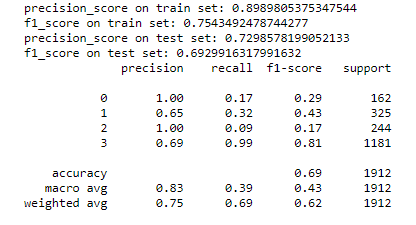

### Balanced Random forest

In [129]:
random_forest_model.fit_deploy()

precision_score on train set: 0.5524512387981023
f1_score on train set: 0.7410071942446043
precision_score on test set: 0.3579849946409432
f1_score on test set: 0.6134937238493724
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       151
           1       0.32      0.77      0.45       319
           2       0.49      0.14      0.21       242
           3       0.86      0.70      0.77      1200

    accuracy                           0.61      1912
   macro avg       0.56      0.49      0.47      1912
weighted avg       0.70      0.61      0.62      1912



<font size ='3'>**Clearly the balanced model performs much better on minority classes** as is evident from significant increase in recall scores of minority classes</font>


In [92]:
# random_forest_model.Randomized_Search_CV(param_dist)

In [93]:
random_forest_model.cross_validation()

F1_score: 65.701% (Std dev. 1.478%)


## XG Boost

In [121]:
Xg_boost =xgb.XGBClassifier( learning_rate = 0.1,n_estimators= 800,max_features = 10,
                            max_depth = 8,subsample= 0.8, metric = 'micro_f1',  min_samples_split= 4,
                            objective = 'multi:softmax', num_class= 4, n_jobs = -1 )
#Xg_boost.get_params()

In [122]:
param_dist = {"max_depth": [2,4, 6, 8, 10],
             "max_features": range(2, 11),
             "min_samples_split": range(2, 11),
             "n_estimators" : range(100,1000,10)
            }

In [123]:
Xg_boost_model = Ml_Model(Xg_boost)
Xg_boost_model.fit_deploy()

precision_score on train set: 1.0
f1_score on train set: 1.0
precision_score on test set: 0.8074656188605108
f1_score on test set: 0.8310669456066946
              precision    recall  f1-score   support

           0       0.84      0.52      0.64       151
           1       0.78      0.64      0.70       319
           2       0.84      0.52      0.64       242
           3       0.84      0.98      0.91      1200

    accuracy                           0.83      1912
   macro avg       0.82      0.67      0.72      1912
weighted avg       0.83      0.83      0.82      1912



In [124]:
Xg_boost_model.cross_validation()

Accuracy: 83.415% (Std dev. 0.179%)


In [115]:
# Xg_boost_model.Randomized_Search_CV(param_dist_weights)

Best Score: 0.7807717462393722
Best Parameters: {'n_estimators': 800, 'min_samples_split': 4, 'max_features': 10, 'max_depth': 8}

In [ ]:
y_pred_series = pd.Series(predictions)

In [ ]:
y_pred_series.replace([0,1,2,3],[1,2,3,4])

In [ ]:
final_predictions = model.predict(dftestf)

In [ ]:
sub_predictions = pd.Series(final_predictions)

In [ ]:
sub_predictions.replace([0,1,2,3],[1,2,3,4],inplace = True)

In [ ]:
Submission_Vaibhav_3F = pd.DataFrame(sub_predictions, columns=['Pred_class'])

In [ ]:
dftest_submission =  pd.concat([dftestf,Submission_Vaibhav_3F], axis=1)

In [ ]:
dftest_submissionF = dftest_submission[['Pred_class']]

In [ ]:
dftest_submissionF.head()

In [ ]:
dftest_submissionF.to_csv('dftest_submissionF')